In [1]:
#Notebook to calculate and plot the genesis and track density from model results and observations,
#using my calcStormDensity function in the TC_calculations.py module.

#10-14-20: adding IBTrACS now that 6-hourly filtering is done

In [2]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from scipy.ndimage.filters import gaussian_filter
import TC_calculations as tcc


In [4]:
#Load the model data saved by Read_Zhao_TCs.ipynb (21 years--1980-2000)
ds_tracks_v1 = xr.open_dataset('nc_from_xarray/zhao_tracks_v1.nc')
ds_tracks_v2 = xr.open_dataset('nc_from_xarray/zhao_tracks_v2.nc')

In [5]:
#Load the IBTrACS observation dataset, as subsetted in Preprocess_IBTrACS.ipynb
ds_IB = xr.open_dataset('data_IBTrACS/IBTrACS_1980_2000_6h_min34_saved_20201014.nc')

In [7]:

#####   PRE-PROCESSING   #####


In [8]:
#Extract the genesis latitudes of the TCs (model)
#Just select the leftmost points of lat and lon
gen_lats_v1 = ds_tracks_v1['lat'].isel(date_time=0).data
gen_lons_v1 = ds_tracks_v1['lon'].isel(date_time=0).data

In [9]:
gen_lats_v2 = ds_tracks_v2['lat'].isel(date_time=0).data
gen_lons_v2 = ds_tracks_v2['lon'].isel(date_time=0).data

In [10]:
#Extract all track latitudes of the TCs (model)
nanlocs_v1 = np.isnan(ds_tracks_v1['lat'].data)
notlocs_v1 = np.bitwise_not(nanlocs_v1) #This works where regular not doesn't
track_lats_v1 = ds_tracks_v1['lat'].data[notlocs_v1]
track_lons_v1 = ds_tracks_v1['lon'].data[notlocs_v1]

In [11]:
nanlocs_v2 = np.isnan(ds_tracks_v2['lat'].data)
notlocs_v2 = np.bitwise_not(nanlocs_v2)
track_lats_v2 = ds_tracks_v2['lat'].data[notlocs_v2]
track_lons_v2 = ds_tracks_v2['lon'].data[notlocs_v2]

In [12]:
#Track points of the observations
#(first non-NaN lat & lon)
nanlocs_IB = np.isnan(ds_IB['usa_lat'].data)
notlocs_IB = np.bitwise_not(nanlocs_IB)
track_lats_IB = ds_IB['usa_lat'].data[notlocs_IB]
track_lons_IB = ds_IB['usa_lon'].data[notlocs_IB]

In [13]:
#How to get genesis points for IBTrACS? Might be nans at the beginning of the rows,
#so have to loop through and find first non-nan lat/lon for each storm.

In [14]:
numStorms = len(ds_IB['usa_lat'].isel(date_time=0))
gen_lats_IB = np.ones(numStorms)*np.nan
gen_lons_IB = np.ones(numStorms)*np.nan
for i in np.arange(numStorms):
    row_lat = ds_IB['usa_lat'].isel(storm=i).data
    row_lon = ds_IB['usa_lon'].isel(storm=i).data
    row_nanlocs = np.isnan(row_lat)
    row_notlocs = np.bitwise_not(row_nanlocs)
    gen_lats_IB[i] = row_lat[row_notlocs][0]
    gen_lons_IB[i] = row_lon[row_notlocs][0]

In [17]:
#Calculate the densities (model)

In [18]:
#Grid for density
grid_lats = np.linspace(-90, 90, 181)
grid_lons = np.linspace(-180,179,360) #Don't duplicate the date line values

In [19]:
gen_density_v1 = tcc.calcStormDensity(gen_lats_v1, gen_lons_v1, grid_lats, grid_lons, 21)

Calculating density--latitude -90.0
Calculating density--latitude -80.0
Calculating density--latitude -70.0
Calculating density--latitude -60.0
Calculating density--latitude -50.0
Calculating density--latitude -40.0
Calculating density--latitude -30.0
Calculating density--latitude -20.0
Calculating density--latitude -10.0
Calculating density--latitude 0.0
Calculating density--latitude 10.0
Calculating density--latitude 20.0
Calculating density--latitude 30.0
Calculating density--latitude 40.0
Calculating density--latitude 50.0
Calculating density--latitude 60.0
Calculating density--latitude 70.0
Calculating density--latitude 80.0
Calculating density--latitude 90.0


In [20]:
gen_density_v2 = tcc.calcStormDensity(gen_lats_v2, gen_lons_v2, grid_lats, grid_lons, 21)

Calculating density--latitude -90.0
Calculating density--latitude -80.0
Calculating density--latitude -70.0
Calculating density--latitude -60.0
Calculating density--latitude -50.0
Calculating density--latitude -40.0
Calculating density--latitude -30.0
Calculating density--latitude -20.0
Calculating density--latitude -10.0
Calculating density--latitude 0.0
Calculating density--latitude 10.0
Calculating density--latitude 20.0
Calculating density--latitude 30.0
Calculating density--latitude 40.0
Calculating density--latitude 50.0
Calculating density--latitude 60.0
Calculating density--latitude 70.0
Calculating density--latitude 80.0
Calculating density--latitude 90.0


In [21]:
gen_density_IB = tcc.calcStormDensity(gen_lats_IB, gen_lons_IB, grid_lats, grid_lons, 21)

Calculating density--latitude -90.0
Calculating density--latitude -80.0
Calculating density--latitude -70.0
Calculating density--latitude -60.0
Calculating density--latitude -50.0
Calculating density--latitude -40.0
Calculating density--latitude -30.0
Calculating density--latitude -20.0
Calculating density--latitude -10.0
Calculating density--latitude 0.0
Calculating density--latitude 10.0
Calculating density--latitude 20.0
Calculating density--latitude 30.0
Calculating density--latitude 40.0
Calculating density--latitude 50.0
Calculating density--latitude 60.0
Calculating density--latitude 70.0
Calculating density--latitude 80.0
Calculating density--latitude 90.0


In [22]:
track_density_v1 = tcc.calcStormDensity(track_lats_v1, track_lons_v1, grid_lats, grid_lons, 21)/4.

Calculating density--latitude -90.0
Calculating density--latitude -80.0
Calculating density--latitude -70.0
Calculating density--latitude -60.0
Calculating density--latitude -50.0
Calculating density--latitude -40.0
Calculating density--latitude -30.0
Calculating density--latitude -20.0
Calculating density--latitude -10.0
Calculating density--latitude 0.0
Calculating density--latitude 10.0
Calculating density--latitude 20.0
Calculating density--latitude 30.0
Calculating density--latitude 40.0
Calculating density--latitude 50.0
Calculating density--latitude 60.0
Calculating density--latitude 70.0
Calculating density--latitude 80.0
Calculating density--latitude 90.0


In [23]:
track_density_v2 = tcc.calcStormDensity(track_lats_v2, track_lons_v2, grid_lats, grid_lons, 21)/4.

Calculating density--latitude -90.0
Calculating density--latitude -80.0
Calculating density--latitude -70.0
Calculating density--latitude -60.0
Calculating density--latitude -50.0
Calculating density--latitude -40.0
Calculating density--latitude -30.0
Calculating density--latitude -20.0
Calculating density--latitude -10.0
Calculating density--latitude 0.0
Calculating density--latitude 10.0
Calculating density--latitude 20.0
Calculating density--latitude 30.0
Calculating density--latitude 40.0
Calculating density--latitude 50.0
Calculating density--latitude 60.0
Calculating density--latitude 70.0
Calculating density--latitude 80.0
Calculating density--latitude 90.0


In [24]:
track_density_IB = tcc.calcStormDensity(track_lats_IB, track_lons_IB, grid_lats, grid_lons, 21)/4.

Calculating density--latitude -90.0
Calculating density--latitude -80.0
Calculating density--latitude -70.0
Calculating density--latitude -60.0
Calculating density--latitude -50.0
Calculating density--latitude -40.0
Calculating density--latitude -30.0
Calculating density--latitude -20.0
Calculating density--latitude -10.0
Calculating density--latitude 0.0
Calculating density--latitude 10.0
Calculating density--latitude 20.0
Calculating density--latitude 30.0
Calculating density--latitude 40.0
Calculating density--latitude 50.0
Calculating density--latitude 60.0
Calculating density--latitude 70.0
Calculating density--latitude 80.0
Calculating density--latitude 90.0


In [25]:
#Filtered versions of genesis and track density (sigma = 2)
#This takes it out of the DataArray so put it back in
fgd_v1 = xr.DataArray(gaussian_filter(gen_density_v1, 2), coords=[gen_density_v1.lat, gen_density_v1.lon])
fgd_v2 = xr.DataArray(gaussian_filter(gen_density_v2, 2), coords=[gen_density_v2.lat, gen_density_v2.lon])
ftd_v1 = xr.DataArray(gaussian_filter(track_density_v1, 2), coords=[track_density_v1.lat, track_density_v1.lon])
ftd_v2 = xr.DataArray(gaussian_filter(track_density_v2, 2), coords=[track_density_v2.lat, track_density_v2.lon])

In [26]:
fgd_IB = xr.DataArray(gaussian_filter(gen_density_IB, 2), coords=[gen_density_IB.lat, gen_density_IB.lon])
ftd_IB = xr.DataArray(gaussian_filter(track_density_IB, 2), coords=[track_density_IB.lat, track_density_IB.lon])

In [29]:

#####   PLOTS   #####


In [30]:
#How did Jeff do this? 
#Track density plot as colors, "2 sigma filtered" (how did he do this? refer to plot?), 
#with colors in increments of 5 from 0 to 30, and
#with contours in intervals of 0.5 (max seems to be about 5, go with 10 to be safe)

In [31]:
# #Simple test plot
# gen_density_v1.plot()
# #Very rudimentary but looks all right.
# #Now, match to what Jeff did

In [32]:
# track_density_v1.plot()
# #This seems off by a factor of 4 compared to Jeff's plot--"days" issue?
# #Yes, Jeff has a factor of 4*simYears in his track density calculation.

In [33]:
#Basemap plot

In [34]:
# #Jeff used this color scale in Matlab:
# # cmap_fromZero_6Scale = [1,1,1;
# 0.941,0.976,0.91;
# 0.941,0.976,0.91; ...
# #     0.941,0.976,0.91;
# 0.941,0.976,0.91;
# 0.941,0.976,0.91; ...
# #     0.941,0.976,0.91;
# 0.941,0.976,0.91;
# 0.941,0.976,0.91; ...
# #     0.941,0.976,0.91;
# 0.941,0.976,0.91;
# 0.8,0.922,0.773;
# 0.8,0.922,0.773; ...
# #     0.8,0.922,0.773;
# 0.8,0.922,0.773;
# 0.8,0.922,0.773;
# 0.8,0.922,0.773; ...
# #     0.8,0.922,0.773;
# 0.8,0.922,0.773;
# 0.8,0.922,0.773;
# 0.8,0.922,0.773; ...
# #     0.8,0.922,0.773;
# 0.659,0.867,0.71;
# 0.659,0.867,0.71;
# 0.659,0.867,0.71; ...
# #     0.659,0.867,0.71;
# 0.659,0.867,0.71;
# 0.659,0.867,0.71; ...
# #     0.659,0.867,0.71;
# 0.659,0.867,0.71;
# 0.659,0.867,0.71; ...
# #     0.659,0.867,0.71;
# 0.659,0.867,0.71;
# 0.482,0.8,0.769;
# 0.482,0.8,0.769; ...
# #     0.482,0.8,0.769;
# 0.482,0.8,0.769;
# 0.482,0.8,0.769;
# 0.482,0.8,0.769; ...
# #     0.482,0.8,0.769;
# 0.482,0.8,0.769;
# 0.482,0.8,0.769;
# 0.482,0.8,0.769; ...
# #     0.482,0.8,0.769;
# 0.263,0.635,0.792;
# 0.263,0.635,0.792; ...
# #     0.263,0.635,0.792;
# 0.263,0.635,0.792;
# 0.263,0.635,0.792; ...
# #     0.263,0.635,0.792;
# 0.263,0.635,0.792;
# 0.263,0.635,0.792;
# #     0.263,0.635,0.792;
# 0.263,0.635,0.792;
# 0.263,0.635,0.792;
# #     0.031,0.408,0.675;
# 0.031,0.408,0.675;
# 0.031,0.408,0.675;
# #     0.031,0.408,0.675;
# 0.031,0.408,0.675;
# 0.031,0.408,0.675;
# #     0.031,0.408,0.675;
# 0.031,0.408,0.675;
# 0.031,0.408,0.675;
# #     0.031,0.408,0.675;
# 0.031,0.408,0.675];

# #Need to figure out how to manually impose a different one in Python.

# #11 of each color, except 10 of lowest one and 1 white.
# #so the lowest contour should be at .5? splits 0 to 5
# #at 1/11th of the way (some error with the other colors then?)

In [35]:
def map_densities(d_tracks, d_gen, title, newfig=True):
    if newfig:
        plt.figure(figsize=(16,12))
        
    #print(d_tracks)
    #print(d_gen)
    
    m = Basemap(projection='cyl', lon_0=-180, lat_0=0) 
    #m = Basemap(projection='robin', lon_0=-180, lat_0=0) 
    #m = Basemap(projection='ortho', lon_0=0, lat_0=0) 
    m.drawcoastlines(linewidth=1)
    m.drawparallels(np.linspace(-90., 90., 7))
    m.drawmeridians(np.array([30, 60, 90, 120, 150, 180, -150, -120, -90, -60, -30]))
    
    
    #Since Basemap contour requires actual mesh lons, lats, and projection applied to it:
    mesh_lons, mesh_lats = np.meshgrid(d_gen.lon, d_gen.lat)
    
    #Track density as filled contours
    thePlot = m.contourf(mesh_lons, mesh_lats, d_tracks, levels=[0, 0.5, 5, 10, 15, 20, 25, 30, 35], cmap='gist_heat_r', latlon=True)
    
    cbar = m.colorbar(thePlot)#, shrink=0.8) #Shrink didn't work
    #cbar.ax.set_ylabel('Track density \n (storm days / 100 $\circ^2$ / year)', fontsize=20)
    cbar.ax.set_ylabel('Track density \n (storm days / 100 $\circ^2$ / year)', fontsize=16)
    cbar.ax.tick_params(labelsize=16)
    
    #Genesis density as open contours
    m.contour(mesh_lons, mesh_lats, d_gen, colors='b', levels=[0.1, .5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7], latlon=True)

    plt.title(title, fontsize=20)
    
    plt.gca().set_ylim(-70,70)
    
    if newfig:
        plt.tight_layout()

/opt/sw/anaconda3/envs/pangeoxtd36/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


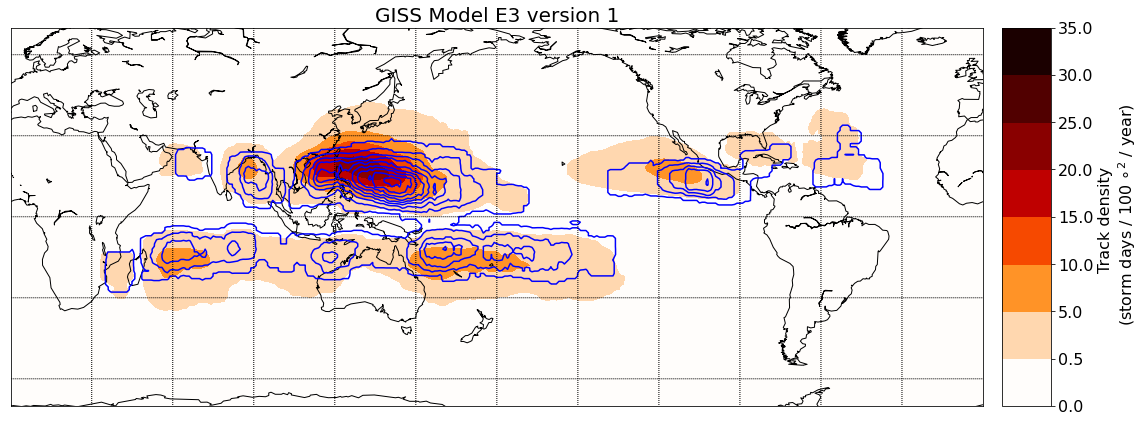

In [37]:
map_densities(track_density_v1, gen_density_v1, 'GISS Model E3 version 1')
plt.savefig('plots/density_v1_unfiltered.png')

/opt/sw/anaconda3/envs/pangeoxtd36/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


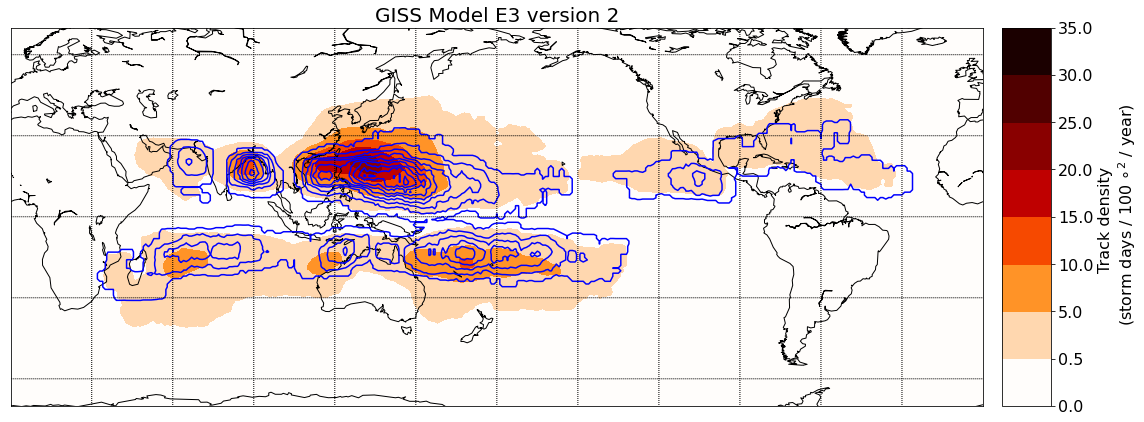

In [38]:
map_densities(track_density_v2, gen_density_v2, 'GISS Model E3 version 2')
plt.savefig('plots/density_v2_unfiltered.png')

/opt/sw/anaconda3/envs/pangeoxtd36/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


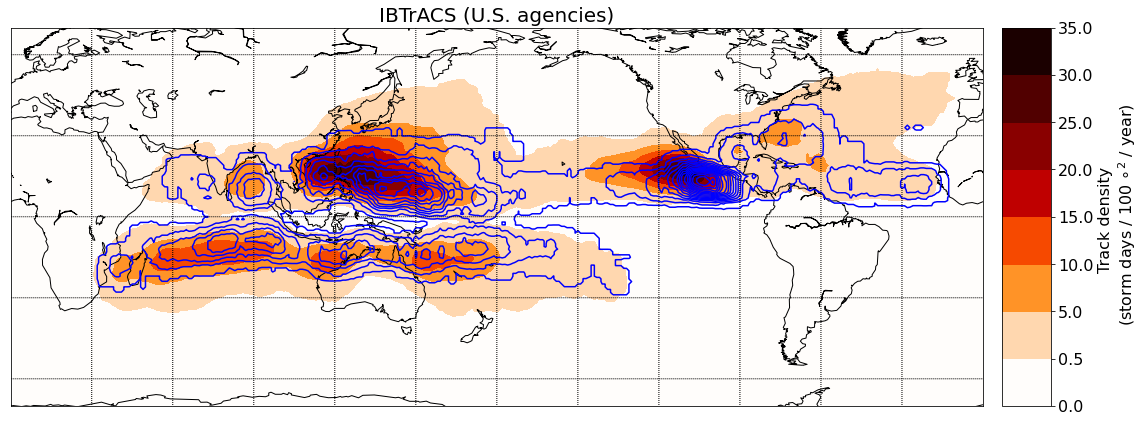

In [39]:
map_densities(track_density_IB, gen_density_IB, 'IBTrACS (U.S. agencies)')
plt.savefig('plots/density_IB_unfiltered.png')

In [40]:
#Gaussian filtered versions

/opt/sw/anaconda3/envs/pangeoxtd36/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


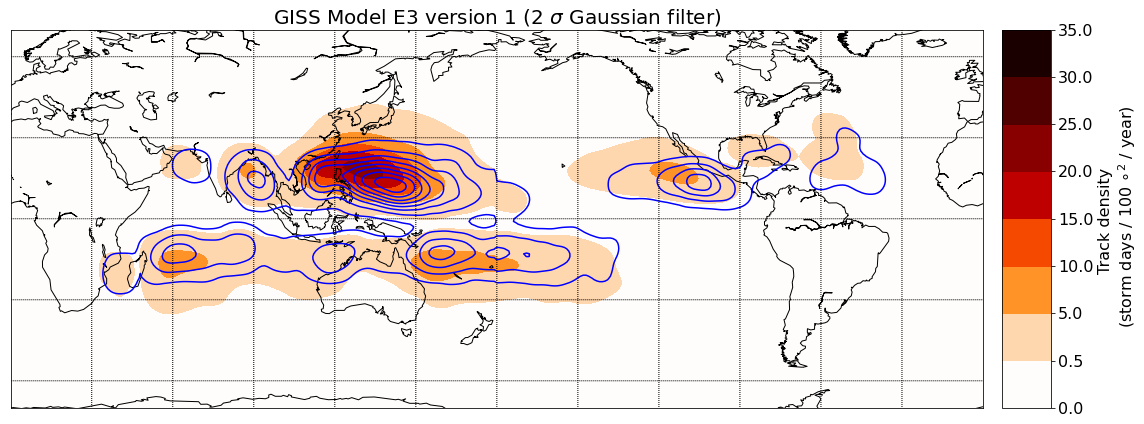

In [41]:
map_densities(ftd_v1, fgd_v1, 'GISS Model E3 version 1 (2 $\sigma$ Gaussian filter)')
plt.savefig('plots/density_v1_filtered.png')

/opt/sw/anaconda3/envs/pangeoxtd36/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


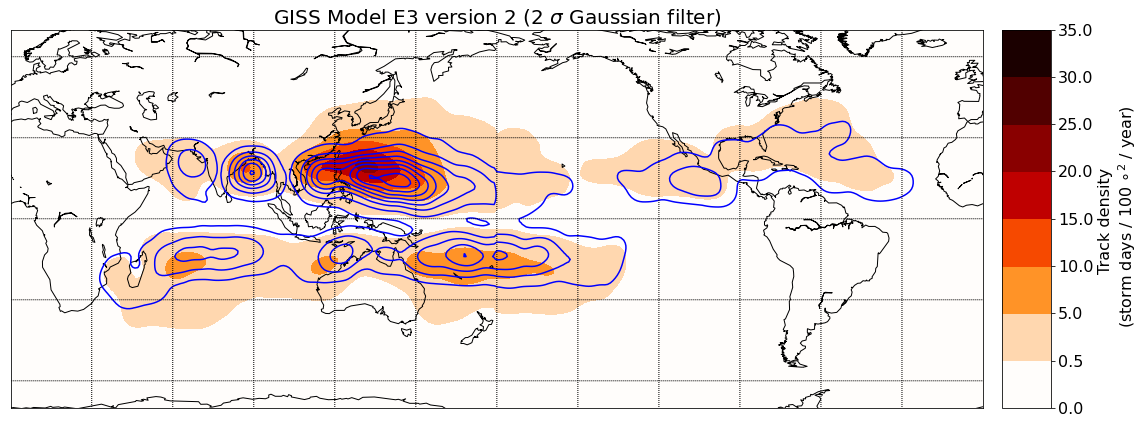

In [42]:
map_densities(ftd_v2, fgd_v2, 'GISS Model E3 version 2 (2 $\sigma$ Gaussian filter)')
plt.savefig('plots/density_v2_filtered.png')

/opt/sw/anaconda3/envs/pangeoxtd36/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


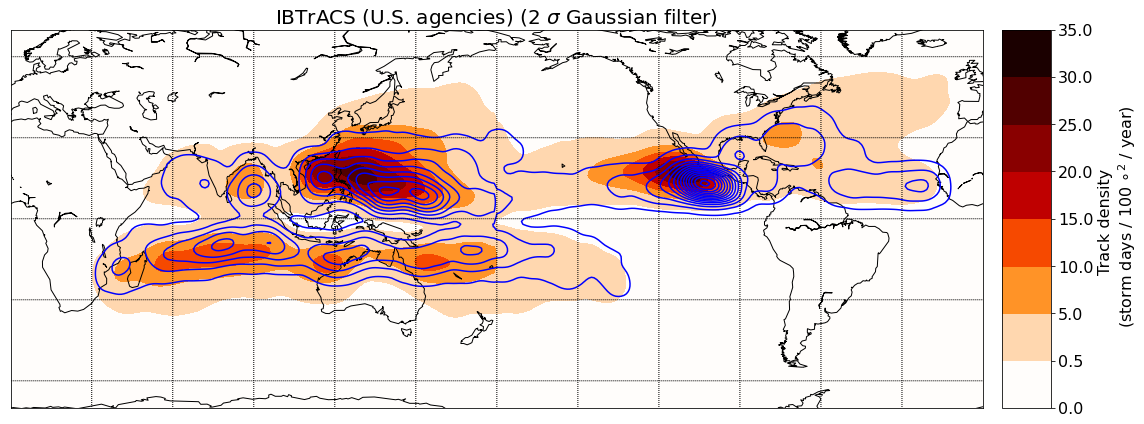

In [43]:
map_densities(ftd_IB, fgd_IB, 'IBTrACS (U.S. agencies) (2 $\sigma$ Gaussian filter)')
plt.savefig('plots/density_IB_filtered.png')

/opt/sw/anaconda3/envs/pangeoxtd36/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


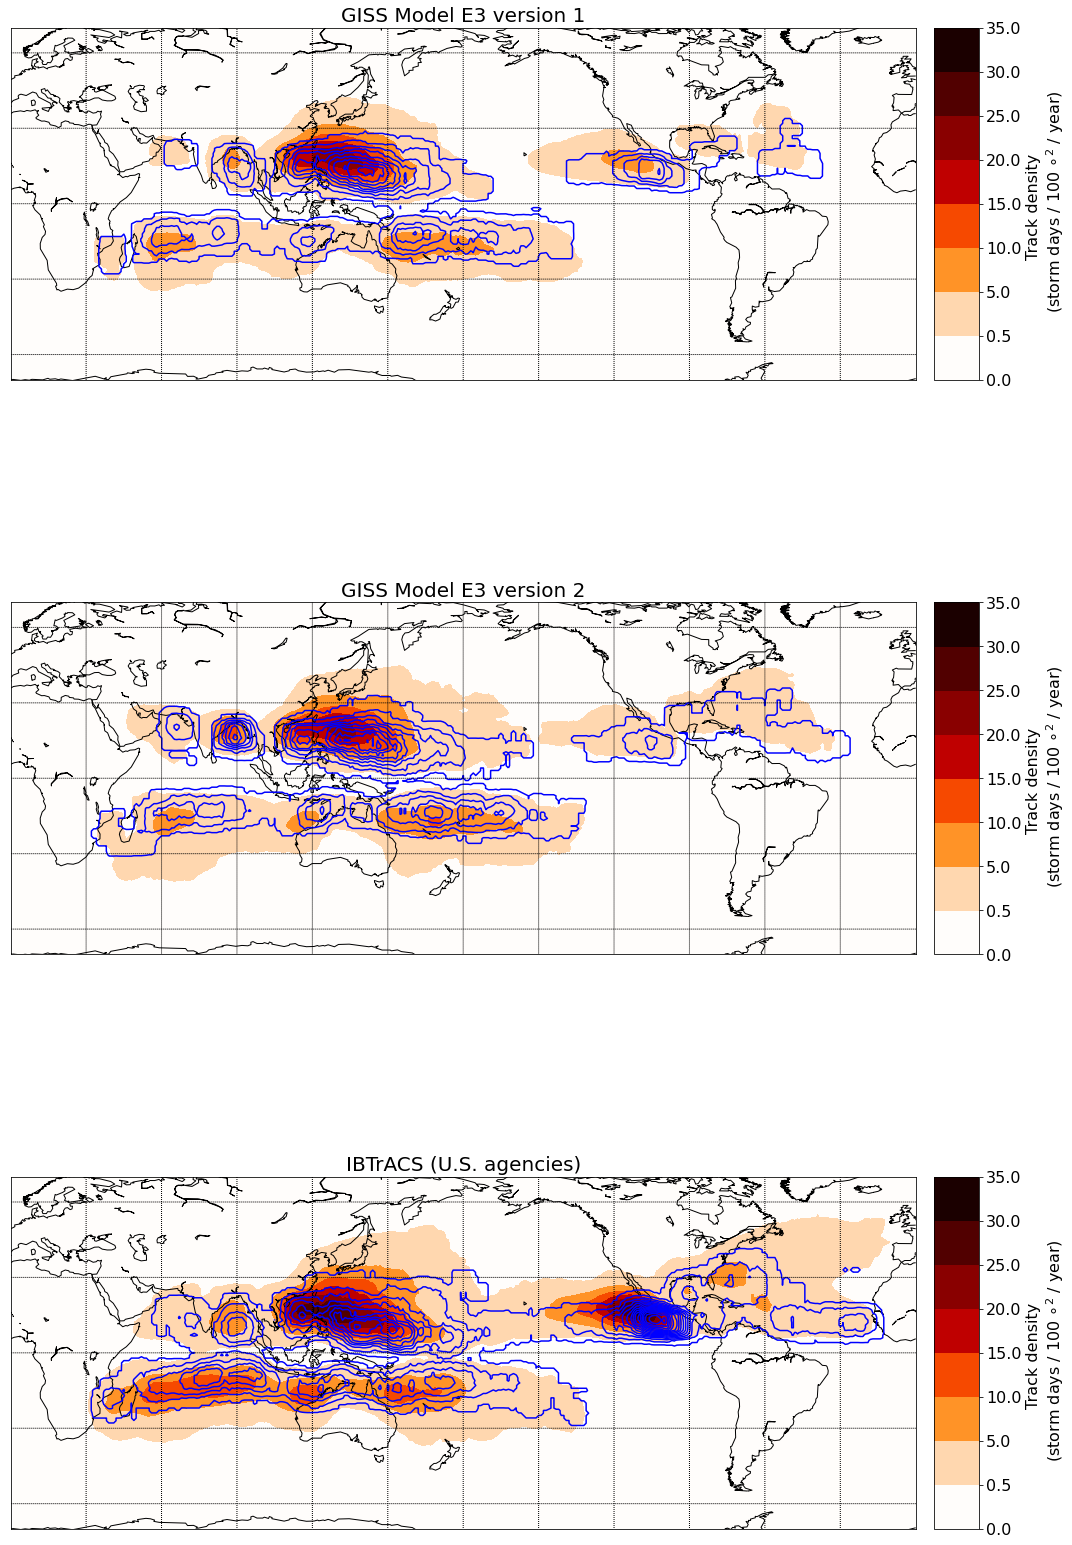

In [44]:
#3-panel versions

plt.figure(figsize=(15,25))
plt.subplot(3,1,1)
map_densities(track_density_v1, gen_density_v1, 'GISS Model E3 version 1', newfig=False)
plt.subplot(3,1,2)
map_densities(track_density_v2, gen_density_v2, 'GISS Model E3 version 2', newfig=False)
plt.subplot(3,1,3)
map_densities(track_density_IB, gen_density_IB, 'IBTrACS (U.S. agencies)', newfig=False)
plt.tight_layout()
plt.savefig('plots/map_density_unfiltered_3panel.png')

/opt/sw/anaconda3/envs/pangeoxtd36/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


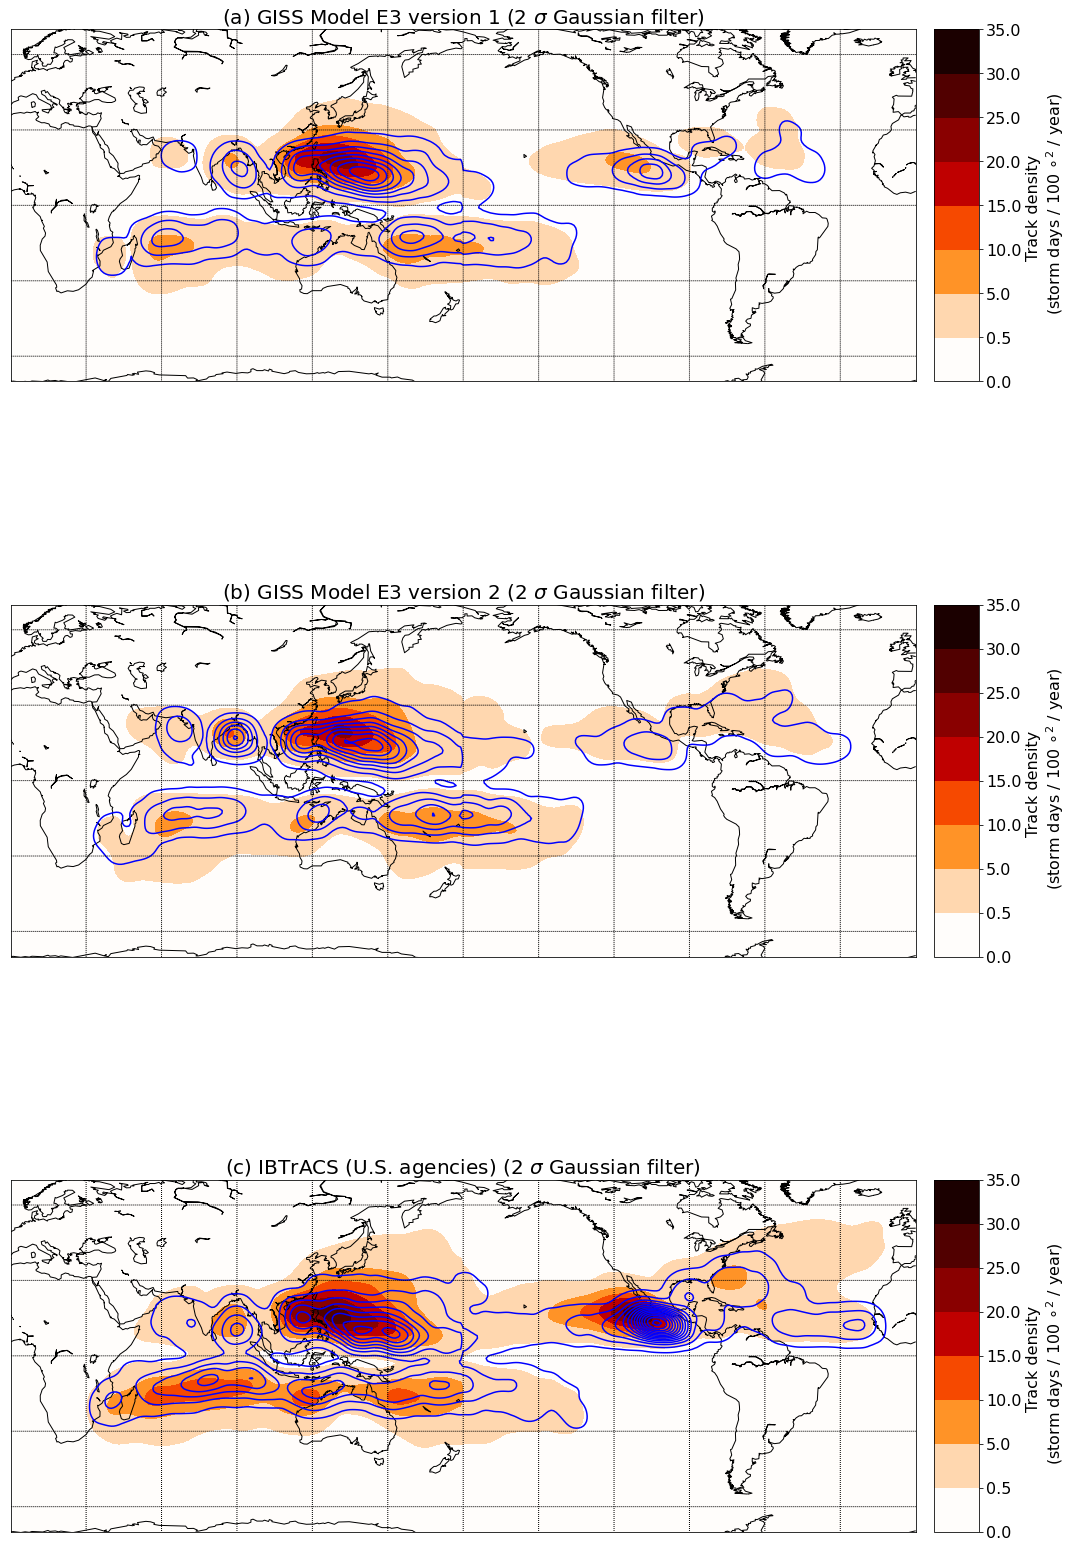

In [45]:
plt.figure(figsize=(15,25))
plt.subplot(3,1,1)
map_densities(ftd_v1, fgd_v1, '(a) GISS Model E3 version 1 (2 $\sigma$ Gaussian filter)', newfig=False)
plt.subplot(3,1,2)
map_densities(ftd_v2, fgd_v2, '(b) GISS Model E3 version 2 (2 $\sigma$ Gaussian filter)', newfig=False)
plt.subplot(3,1,3)
map_densities(ftd_IB, fgd_IB, '(c) IBTrACS (U.S. agencies) (2 $\sigma$ Gaussian filter)', newfig=False)
plt.tight_layout()
plt.savefig('plots/map_density_filtered_3panel.png')

In [46]:
#Filter seems to have helped. 
#But while the v1 plot looks exactly the same as what Jeff had on Flurry, 
#The v2 looks slightly different, e.g. missing the 2 spots in South Atlantic.
#Looks like I migth not have the most recent version for Jeff's v2 
#(Might be on Discover, not Flurry). Filter criterion might have been changed. 
#(Find the Discover version?)
#Also, Jeff used a different sigma for filtering the tracks, not 2--
#supposedly 0.5 (or whatever the default is)

#Note also Jeff used 20 degrees E as the right boundary. 
#Would fix issue with ET tracks. 

In [47]:
#After much difficulty, seems to have worked! 
#Latlon argument was the key, Basemap handles wrapping just fine. 
#But why no genesis in the North Atlantic unlike in Jeff's plots?
#Oh: wasn't using 0.1 contour like he did.
#Gaussian filter? Could it be applied to the 

In [51]:
#10-8-20: downloaded "correct" V2 figure from Discover (not Flurry) and it looks exactly the same as the V2 here. 

In [52]:
#11-16-20: new 3-panel plot going from -70 to 70 instead of -90 to 90 re latitude

/opt/sw/anaconda3/envs/pangeoxtd36/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


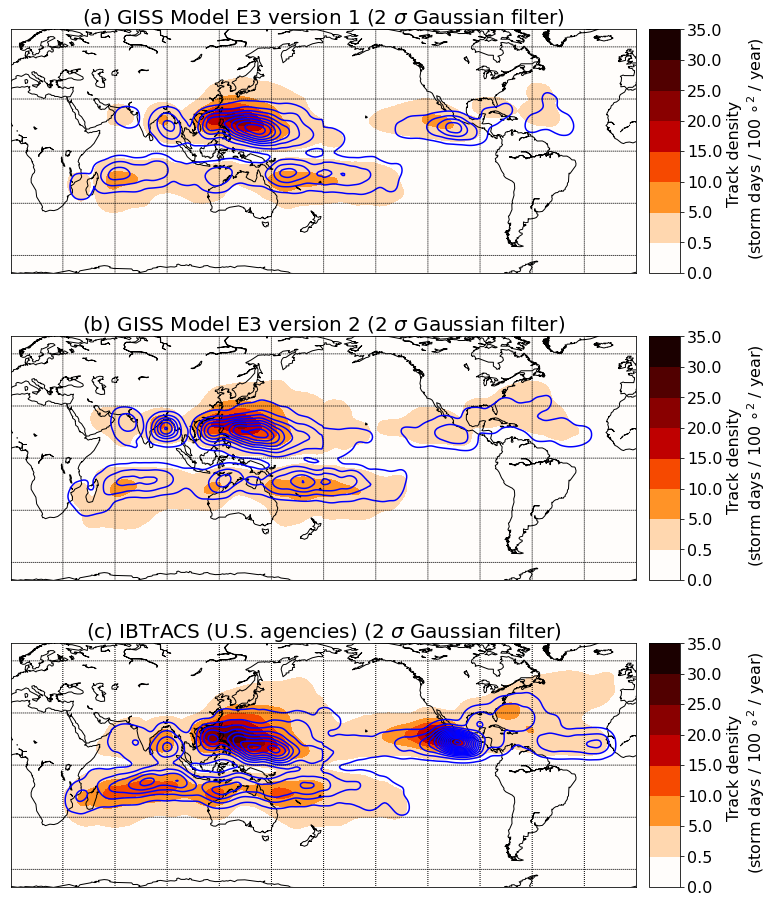

In [53]:
plt.figure(figsize=(12,16))
plt.subplot(3,1,1)
map_densities(ftd_v1, fgd_v1, '(a) GISS Model E3 version 1 (2 $\sigma$ Gaussian filter)', newfig=False)
plt.subplot(3,1,2)
map_densities(ftd_v2, fgd_v2, '(b) GISS Model E3 version 2 (2 $\sigma$ Gaussian filter)', newfig=False)
plt.subplot(3,1,3)
map_densities(ftd_IB, fgd_IB, '(c) IBTrACS (U.S. agencies) (2 $\sigma$ Gaussian filter)', newfig=False)
#plt.tight_layout()
plt.savefig('plots/map_density_filtered_3panel_70.png')